In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()
# dummy var: include categorical var into regression model

In [2]:
raw_data = pd.read_csv("Dummies.csv") # attendance - yes or no 
data = raw_data.copy()
data["Attendance"] = data["Attendance"].map({'Yes': 1, 'No': 0})
data.describe()
# mean is 0.464286 -> more 0s than 1s

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [3]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()
# adjusted r increased
# GPA = 0.6439 + 0.0014SAT + 0.2226Dummy
# dummy is 0 or 1 
# for 0 -> GPA = 0.6439 + 0.0014SAT
# for 1 -> GPA 0.8665 + 0.0014SAT

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 12 Sep 2025   Prob (F-statistic):           2.19e-15
Time:                        21:39:23   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

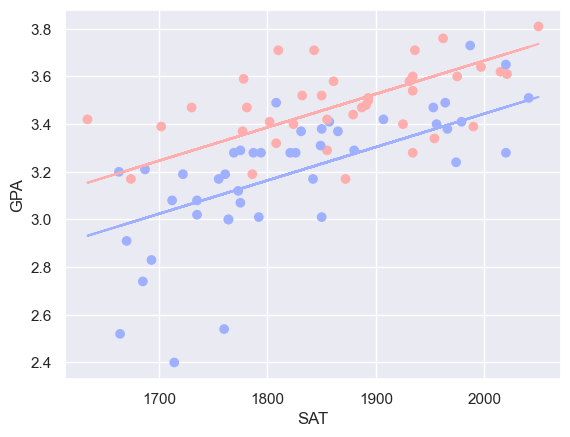

In [4]:
plt.scatter(data['SAT'], y, c=data['Attendance'], cmap='berlin')
cmap = plt.cm.berlin
yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']
fig = plt.plot(data['SAT'], yhat_no, color=cmap(0.0))
fig = plt.plot(data['SAT'], yhat_yes, color=cmap(1.0))
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [5]:
# statsmodel method takes data frame and makes predictions
# bob 1700 did not attend and alice 1670 attended 
new_data = pd.DataFrame({'const': 1, 'SAT': [1700, 1670], 'Attendance': [0, 1]})
new_data = new_data[['const', 'SAT', 'Attendance']]
new_data
new_data.rename(index = {0: 'Bob', 1: 'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [6]:
predictions = results.predict(new_data)
predictions_df = pd.DataFrame({'Predictions': predictions})
joined = new_data.join(predictions_df)
joined.rename(index = {0: 'Bob', 1: 'Alice'})
# we have good predictions thanks to dummy var

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
